In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.fft import fft, rfft, rfftfreq, fftfreq, ifft

## Frequency: 10 Hz, Amplitude: 8 - 5 in the row

### Medium

In [4]:
#https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2. * np.pi * guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [295]:
def min_max_scaler(x):
    return (x - x.min()) / x.max()

In [5]:
data_10hz_8 = pd.read_csv('data/10hz-8-1.txt', sep='\t')

In [6]:
data_10hz_8.head()

,t,x
0,0.00,115.45
1,0.24,112.65
2,0.48,108.75
3,0.72,105.70
4,0.96,104.45


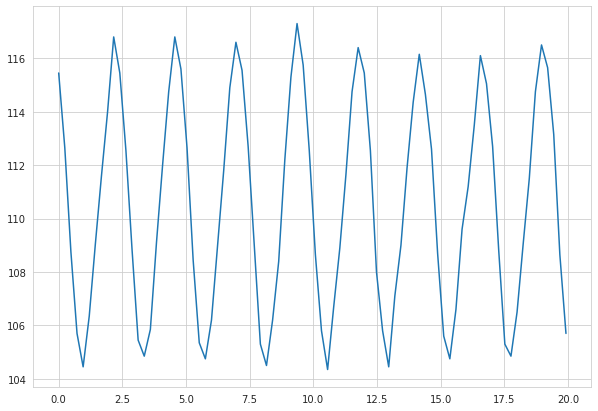

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.plot(data_10hz_8['t'], data_10hz_8['x'])

According to the specs of the speed camera we've been having shoots with 600 pieces/second rate. And got only 500 shoots. So i would assume what there're only 5/6 of the second as the time

In [86]:
sin_fit_res = fit_sin(data_10hz_8['t']/24, data_10hz_8['x'])
sin_fit_res

{'amp': -5.729412204217859,
 'omega': 62.830459867064036,
 'phase': -0.9607170218764342,
 'offset': 110.51866978947682,
 'freq': 9.999778264580192,
 'period': 0.10000221740336578,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.006147378379887002,
 'rawres': (array([  5.73764101,  59.83986007,   0.        , 110.52261905]),
  array([ -5.7294122 ,  62.83045987,  -0.96071702, 110.51866979]),
  array([[ 6.14737838e-03,  1.22709903e-04, -5.13805148e-05,
           4.08300142e-06],
         [ 1.22709903e-04,  3.04352940e-03, -1.26388114e-03,
          -1.54535319e-06],
         [-5.13805148e-05, -1.26388114e-03,  7.08048401e-04,
           3.90852978e-05],
         [ 4.08300142e-06, -1.54535319e-06,  3.90852978e-05,
           3.04268712e-03]]))}

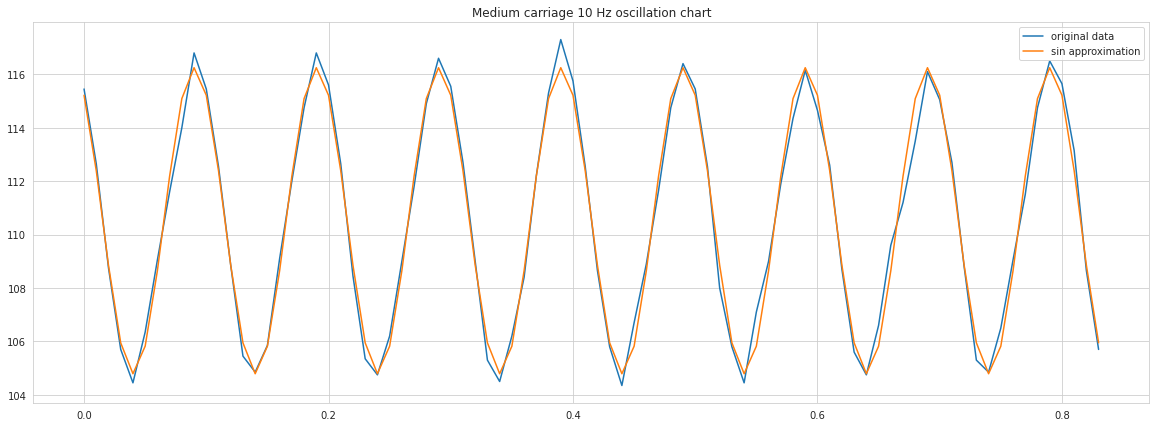

In [102]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
plt.title('Medium carriage 10 Hz oscillation chart')
plt.plot(data_10hz_8['t']/24, data_10hz_8['x'], label = 'original data')
plt.plot(data_10hz_8['t']/24, fit_sin((data_10hz_8['t']/24), data_10hz_8['x'])['fitfunc']((data_10hz_8['t']/24)), label = 'sin approximation')
plt.legend()
plt.show()

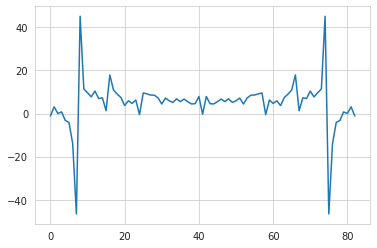

In [81]:
nump_dat = data_10hz_8['x'].to_numpy()
plt.plot(fft(data_10hz_8['x'].to_numpy())[1:])

### Left carriage

In [92]:
data_10hz_8_2 = pd.read_csv('data/10hz-8-2.txt', sep='\t')

In [93]:
data_10hz_8_2.head()

,t,x,t_1,x_1
0,0.00,115.45,0.00,-109.45
1,0.24,112.65,0.24,-109.55
2,0.48,108.75,0.48,-109.75
3,0.72,105.70,0.72,-109.80
4,0.96,104.45,0.96,-108.30


In [95]:
fit_sin((data_10hz_8_2['t_1']/24), data_10hz_8_2['x_1'])

{'amp': 2.1227116441124316,
 'omega': 62.77003729683996,
 'phase': -2.7244475962218777,
 'offset': -107.83689324889303,
 'freq': 9.990161713854711,
 'period': 0.10009847974864756,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.026657423807405562,
 'rawres': (array([   2.25640936,   59.83986007,    0.        , -107.91190476]),
  array([   2.12271164,   62.7700373 ,   -2.7244476 , -107.83689325]),
  array([[ 6.76510578e-03,  3.52504297e-04, -1.61977015e-04,
           2.42300791e-04],
         [ 3.52504297e-04,  2.66574238e-02, -1.09790448e-02,
           2.80371837e-04],
         [-1.61977015e-04, -1.09790448e-02,  6.05302187e-03,
          -8.83446363e-05],
         [ 2.42300791e-04,  2.80371837e-04, -8.83446363e-05,
           3.42191223e-03]]))}

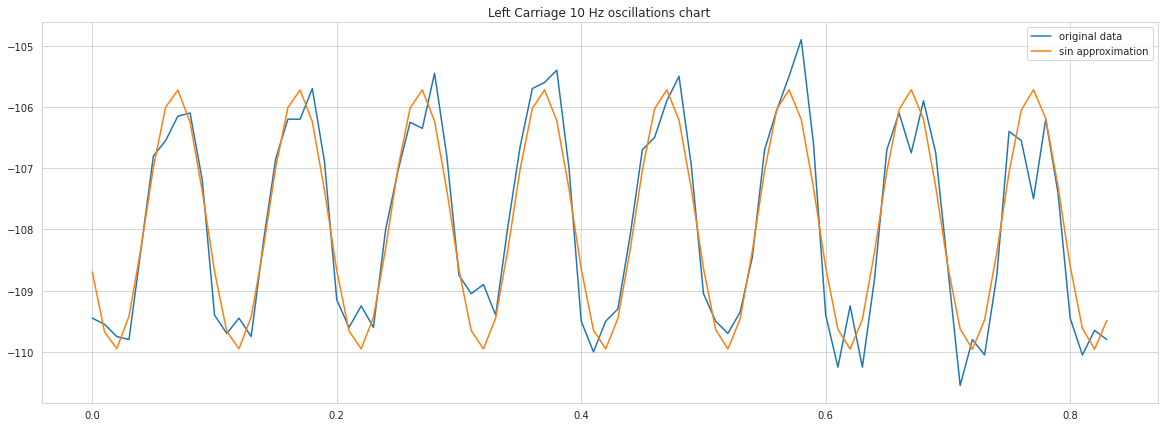

In [101]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
plt.title('Left Carriage 10 Hz oscillations chart')
plt.plot(data_10hz_8_2['t_1']/24, data_10hz_8_2['x_1'], label = 'original data')
plt.plot(data_10hz_8_2['t_1']/24, fit_sin((data_10hz_8_2['t_1']/24), data_10hz_8_2['x_1'])['fitfunc']((data_10hz_8_2['t_1']/24)), label = 'sin approximation')
plt.legend()
plt.show()

### Right Carriage

In [96]:
data_10hz_8_3 = pd.read_csv('data/10hz-8-3.txt', sep='\t')

In [98]:
data_10hz_8_3.head()

,t,x
0,0.00,579.40
1,0.24,576.15
2,0.48,571.05
3,0.72,565.95
4,0.96,562.30


In [99]:
fit_sin((data_10hz_8_3['t']/24), data_10hz_8_3['x'])

{'amp': -8.9227925737081,
 'omega': 62.699677268680354,
 'phase': -1.1531694422274146,
 'offset': 571.3942829123556,
 'freq': 9.978963567577026,
 'period': 0.10021080778860968,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.0035040652194785874,
 'rawres': (array([  8.88483383,  59.83986007,   0.        , 571.47857143]),
  array([ -8.92279257,  62.69967727,  -1.15316944, 571.39428291]),
  array([[ 3.50406522e-03,  3.55705156e-05, -1.73179968e-05,
           3.18669451e-05],
         [ 3.55705156e-05,  7.15425354e-04, -2.99289148e-04,
          -9.28785269e-06],
         [-1.73179968e-05, -2.99289148e-04,  1.68263405e-04,
           1.72074856e-05],
         [ 3.18669451e-05, -9.28785269e-06,  1.72074856e-05,
           1.73467848e-03]]))}

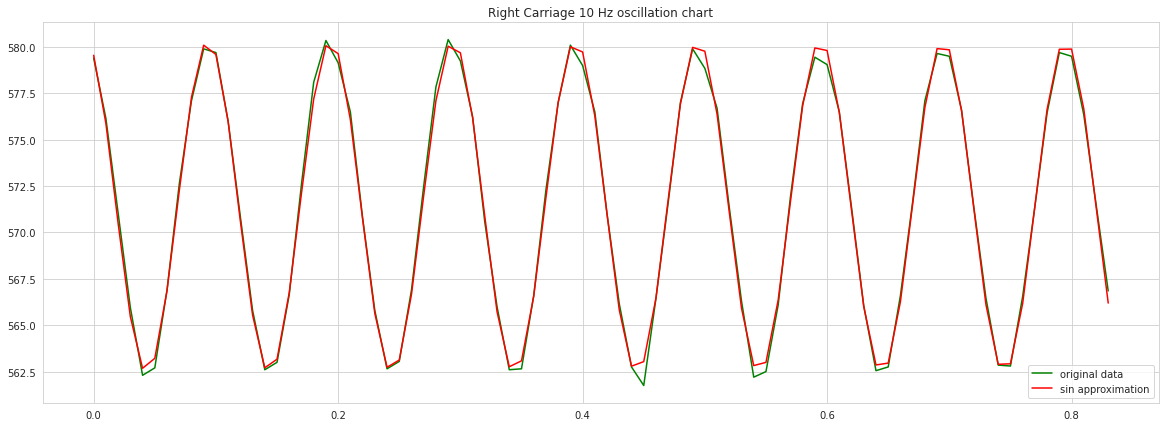

In [103]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
plt.title('Right Carriage 10 Hz oscillation chart')
plt.plot(data_10hz_8_3['t']/24, data_10hz_8_3['x'], color = 'green', label = 'original data')
plt.plot(data_10hz_8_3['t']/24, fit_sin((data_10hz_8_3['t']/24), data_10hz_8_3['x'])['fitfunc']((data_10hz_8_3['t']/24)), color = 'red', label = 'sin approximation')
plt.legend()
plt.show()

## Frequency: 14.4 Hz, Amplitude: 6 - 6 in the row

### Medium carriage

In [317]:
data_14hz_6_1 = pd.read_csv('data/14.4hz-6-1.txt', sep='\t')

In [318]:
data_14hz_6_1.head()

,t,x
0,0.00,13.459618
1,0.24,13.745747
2,0.48,14.151866
3,0.72,14.516450
4,0.96,14.456455


In [319]:
fit_sin(data_14hz_6_1['t']/24, data_14hz_6_1['x'])

{'amp': 0.5494588867699459,
 'omega': 89.37963193771628,
 'phase': -1.373903009511849,
 'offset': 13.958026774717789,
 'freq': 14.225210234621786,
 'period': 0.07029773082482585,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.0016437361073389333,
 'rawres': (array([ 0.55068356, 89.7597901 ,  0.        , 13.96023405]),
  array([ 0.54945889, 89.37963194, -1.37390301, 13.95802677]),
  array([[ 2.94231611e-05, -3.87048704e-06,  1.81136757e-06,
          -1.40767921e-07],
         [-3.87048704e-06,  1.64373611e-03, -6.89549637e-04,
           9.52311752e-06],
         [ 1.81136757e-06, -6.89549637e-04,  3.86056927e-04,
          -4.08848950e-06],
         [-1.40767921e-07,  9.52311752e-06, -4.08848950e-06,
           1.47139628e-05]]))}

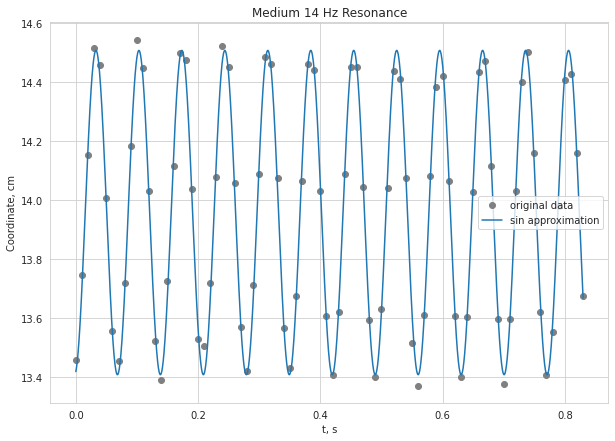

In [321]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Medium 14 Hz Resonance')
plt.scatter(data_14hz_6_1['t']/24, data_14hz_6_1['x'], label = 'original data', color = 'gray')
plt.plot(np.arange(data_14hz_6_1['t'].min(), data_14hz_6_1['t'].max(), 0.01)/24, fit_sin(data_14hz_6_1['t']/24, data_14hz_6_1['x'])['fitfunc'](np.arange(data_14hz_6_1['t'].min(), data_14hz_6_1['t'].max(), 0.01)/24), label = 'sin approximation')
plt.legend()
plt.ylabel('Coordinate, cm')
plt.xlabel('t, s')
plt.show()

In [121]:
data_14hz_6_1['x'].shape[0]

84

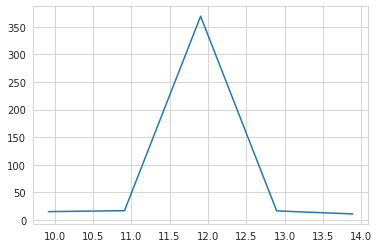

In [150]:
nump_dat = data_14hz_6_1['x'].to_numpy()
frequencies = rfftfreq(84, 0.012)
amplitudes  = rfft(data_14hz_6_1['x'].to_numpy())

plt.plot(frequencies[10:15], abs(amplitudes[10:15]))

None

In [157]:
frequencies[1:][abs(amplitudes[1:]).argmax()]

11.904761904761905

## Frequency: 17 Hz, Amplitude: 6 - 5 in the row

### Medium first front

In [175]:
data_17hz_5_1 = pd.read_csv('data/17hz-5-1.txt', sep='\t')

In [176]:
data_17hz_5_1.head()

,t,x
0,0.00,21.707753
1,0.24,21.778623
2,0.48,21.812517
3,0.72,21.945013
4,0.96,22.123728


In [177]:
data_17hz_5_1.shape

(84, 2)

In [178]:
fit_sin(data_17hz_5_1['t']/24, data_17hz_5_1['x'])

{'amp': 0.3030583600648896,
 'omega': 53.15010661673307,
 'phase': -0.5198495513983433,
 'offset': 21.768332792653663,
 'freq': 8.459102193914322,
 'period': 0.11821585519080542,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.03990015546438713,
 'rawres': (array([ 0.32967569, 52.35987756,  0.        , 21.76637094]),
  array([ 0.30305836, 53.15010662, -0.51984955, 21.76833279]),
  array([[ 2.22969719e-04,  5.94863772e-05, -1.61509504e-05,
           1.54914505e-06],
         [ 5.94863772e-05,  3.99001555e-02, -1.63261654e-02,
           9.34061133e-05],
         [-1.61509504e-05, -1.63261654e-02,  9.06475335e-03,
          -4.77599903e-05],
         [ 1.54914505e-06,  9.34061133e-05, -4.77599903e-05,
           1.10690295e-04]]))}

In [188]:
fit_sin(data_17hz_5_1['t']/24, data_17hz_5_1['x'])['freq'] * 2

16.907655446135276

In [168]:
np.arange((data_17hz_5_1['t']).min(), (data_17hz_5_1['t']).max(), 0.5)/24

array([0.        , 0.02083333, 0.04166667, 0.0625    , 0.08333333,
       0.10416667, 0.125     , 0.14583333, 0.16666667, 0.1875    ,
       0.20833333, 0.22916667, 0.25      , 0.27083333, 0.29166667,
       0.3125    , 0.33333333, 0.35416667, 0.375     , 0.39583333,
       0.41666667, 0.4375    , 0.45833333, 0.47916667, 0.5       ,
       0.52083333, 0.54166667, 0.5625    , 0.58333333, 0.60416667,
       0.625     , 0.64583333, 0.66666667, 0.6875    , 0.70833333,
       0.72916667, 0.75      , 0.77083333, 0.79166667, 0.8125    ])

In [161]:
(data_17hz_5_1['t']/24).max()

0.8300000000000001

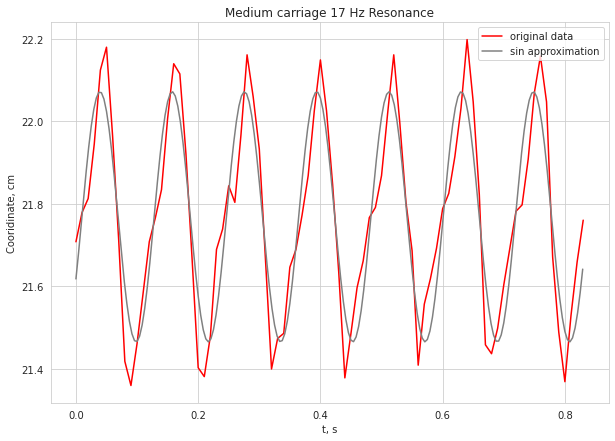

In [233]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Medium carriage 17 Hz Resonance')
plt.plot(data_17hz_5_1['t']/24,  data_17hz_5_1['x'], color = 'red', label = 'original data')
plt.plot(np.arange((data_17hz_5_1['t']).min(), (data_17hz_5_1['t']).max(), 0.1)/24, fit_sin(data_17hz_5_1['t']/24, data_17hz_5_1['x'])['fitfunc'](np.arange((data_17hz_5_1['t']).min(), (data_17hz_5_1['t']).max(), 0.1)/24), color = 'gray', label = 'sin approximation')
plt.xlabel('t, s')
plt.ylabel('Cooridinate, cm')
plt.legend()
plt.show()

### Medium second front

In [4]:
data_17hz_5_2 = pd.read_csv('data/17hz-5-2.txt', sep='\t')

In [5]:
data_17hz_5_2.shape

(84, 2)

In [6]:
data_17hz_5_2.head()

,t,x
0,0.00,352.25
1,0.24,353.40
2,0.48,353.95
3,0.72,356.10
4,0.96,359.00


In [7]:
fit_sin(data_17hz_5_2['t']/24, data_17hz_5_2['x'])

{'amp': 4.917704255504932,
 'omega': 53.150106195550855,
 'phase': -0.5198493167181134,
 'offset': 353.2330252211057,
 'freq': 8.45910212688109,
 'period': 0.11821585612759407,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.058710823719141395,
 'rawres': (array([  5.34962144,  52.35987756,   0.        , 353.20119048]),
  array([  4.91770426,  53.1501062 ,  -0.51984932, 353.23302522]),
  array([[ 0.05871082,  0.00096529, -0.00026208,  0.00040791],
         [ 0.00096529,  0.03990015, -0.01632616,  0.00151568],
         [-0.00026208, -0.01632616,  0.00906475, -0.00077499],
         [ 0.00040791,  0.00151568, -0.00077499,  0.02914619]]))}

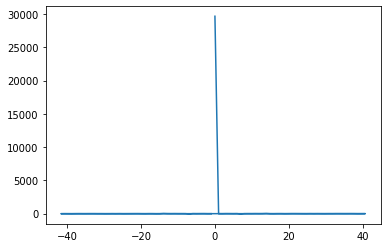

In [12]:
plt.plot(fftfreq(84, 6/500), fft(data_17hz_5_2['x'].to_numpy()))

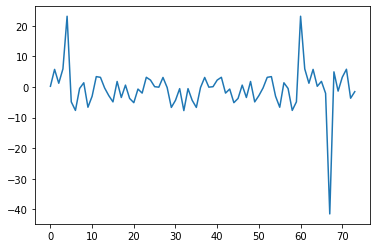

In [14]:
plt.plot(fft(data_17hz_5_2['x'].to_numpy())[10:])

And again freq is 8.45

## Frequency: 15 Hz, Amplitude: 6 - 5 in the row, without air

In [312]:
data_15hz_airless = pd.read_csv('data/15hz-6-table_off.txt', sep='\t')

In [313]:
data_15hz_airless.head()

,t,x
0,0.00,564.65
1,0.24,572.45
2,0.48,580.05
3,0.72,580.20
4,0.96,573.50


In [314]:
fit_sin(data_15hz_airless['t']/24, data_15hz_airless['x'])

{'amp': 9.023399657658322,
 'omega': 95.9424683232641,
 'phase': -0.8878676580809183,
 'offset': 571.867882723267,
 'freq': 15.269718086085069,
 'period': 0.06548909379743403,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.005643941405738956,
 'rawres': (array([  9.00160554,  97.23977261,   0.        , 571.98154762]),
  array([  9.02339966,  95.94246832,  -0.88786766, 571.86788272]),
  array([[ 5.64394141e-03, -2.55289247e-05,  1.57516389e-05,
          -7.33423345e-05],
         [-2.55289247e-05,  1.13612812e-03, -4.73644214e-04,
           9.11414830e-05],
         [ 1.57516389e-05, -4.73644214e-04,  2.65378586e-04,
          -4.08058854e-05],
         [-7.33423345e-05,  9.11414830e-05, -4.08058854e-05,
           2.80071943e-03]]))}

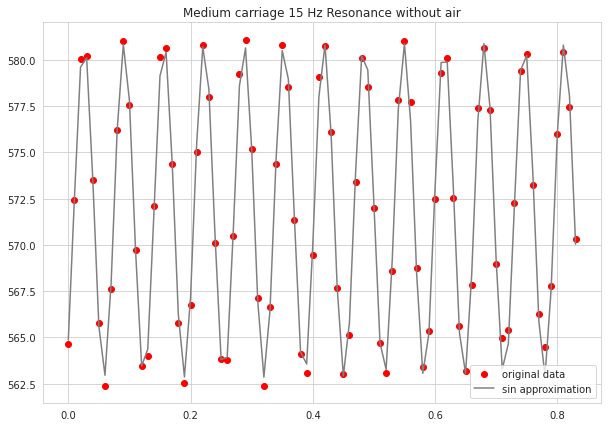

In [315]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Medium carriage 15 Hz Resonance without air')
plt.scatter(data_15hz_airless['t']/24, data_15hz_airless['x'], color = 'red', label = 'original data')
plt.plot(data_15hz_airless['t']/24, fit_sin(data_15hz_airless['t']/24, data_15hz_airless['x'])['fitfunc'](data_15hz_airless['t']/24), color = 'gray', label = 'sin approximation')
plt.legend()
plt.show()

## Logarithmic decrement

### 13.4Hz Air off Decrement

In [49]:
data_damping_decrment = pd.read_csv('data/13.4Hz Damping.txt', sep='\t')

In [4]:
data_damping_decrment.head()

,t,x
0,0.00,210.05
1,0.16,202.85
2,0.32,195.30
3,0.48,190.95
4,0.64,191.00


In [7]:
data_damping_decrment['t'][::-1]

105    16.96
104    16.80
103    16.64
102    16.48
101    16.32
       ...  
4       0.64
3       0.48
2       0.32
1       0.16
0       0.00
Name: t, Length: 106, dtype: float64

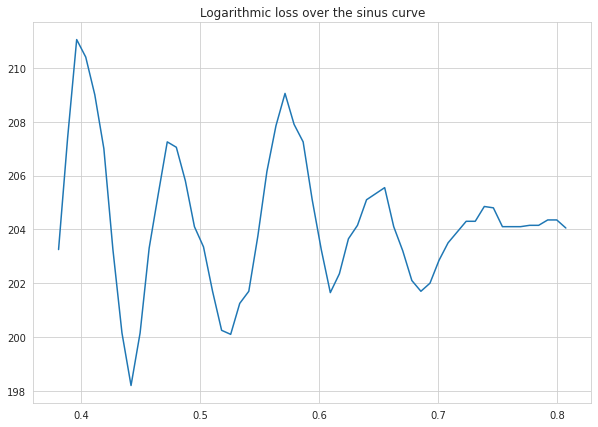

In [86]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Logarithmic loss over the sinus curve')
plt.plot((data_damping_decrment['t']/17.5 * 5/6)[50:], data_damping_decrment['x'][50:])

In [81]:
data_arr = data_damping_decrment['x'][50:].to_numpy()
data_time_arr = ((data_damping_decrment['t']/17.5 * 5/6)[50:]).to_numpy()
extremal_vals = []
extremal_ids  = []
extremal_times = []

for i in range(1, data_arr.shape[0] - 1):
    if data_arr[i - 1] > data_arr[i] and data_arr[i + 1] > data_arr[i]:
        extremal_vals.append(data_arr[i])
        extremal_ids.append(i)

for i in extremal_ids:
    extremal_times.append(data_time_arr[i])

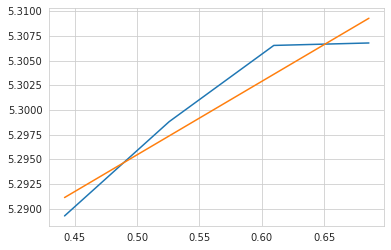

In [89]:
sns.set_style('whitegrid')
plt.plot(extremal_times, np.log(np.array(extremal_vals)))

k, b = np.polyfit(extremal_times, np.log(np.array(extremal_vals)), deg = 1)
plt.plot(extremal_times, k * np.array(extremal_times) + b)


In [91]:
print(1/k)

13.433724648956217


In [31]:
fit_sin(((data_damping_decrment['t']/17.5 * 5/6)[:40]).to_numpy(), (data_damping_decrment['x'][:40]).to_numpy())

{'amp': 12.50739381910376,
 'omega': 76.34822877615488,
 'phase': 2.5841215981873478,
 'offset': 204.25638820622348,
 'freq': 12.151198006035937,
 'period': 0.08229641221410959,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 0.13208084998238387,
 'rawres': (array([ 12.38007472,  82.46680716,   0.        , 203.4       ]),
  array([ 12.50739382,  76.34822878,   2.5841216 , 204.25638821]),
  array([[ 1.32080850e-01,  5.36075040e-04,  1.21235778e-04,
           9.02244770e-03],
         [ 5.36075040e-04,  9.41034844e-02, -1.39382199e-02,
          -1.00945880e-02],
         [ 1.21235778e-04, -1.39382199e-02,  2.83688979e-03,
           1.64982696e-03],
         [ 9.02244770e-03, -1.00945880e-02,  1.64982696e-03,
           6.45014592e-02]]))}

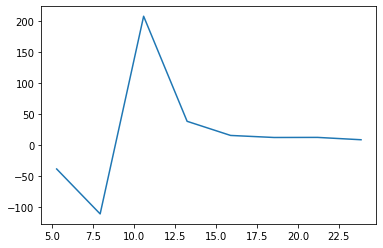

In [44]:
plt.plot(rfftfreq(40, 6/636)[2:10], rfft(((data_damping_decrment['x'])[:40]).to_numpy())[2:10])

### 13.4Hz Air on Decrement

In [297]:
data_damping_decrment_air_on = pd.read_csv('data/13.4Hz Damping AirOn.txt', sep='\t')

In [298]:
data_damping_decrment_air_on.head()

,t,x
0,0.00,24.232549
1,0.24,24.960498
2,0.48,24.756547
3,0.72,23.824646
4,0.96,23.087284


In [299]:
data_damping_decrment_air_on.describe()

,t,x
count,87.000000,87.000000
mean,10.320000,23.791213
std,6.062079,0.527230
min,0.000000,22.594663
25%,5.160000,23.481067
50%,10.320000,23.777581
75%,15.480000,24.100765
max,20.640000,24.973049


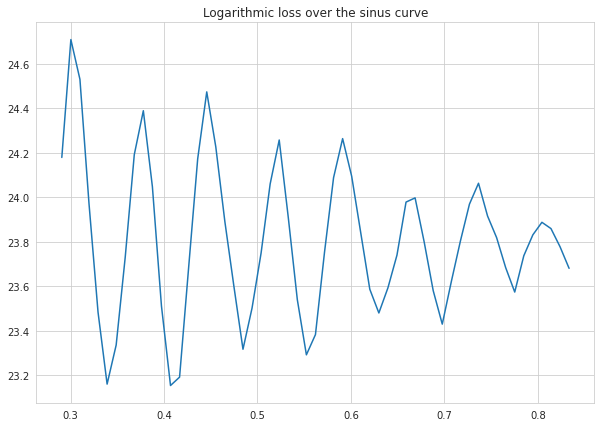

In [300]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Logarithmic loss over the sinus curve')
plt.plot((data_damping_decrment_air_on['t']/20.64 * 5/6)[30:], data_damping_decrment_air_on['x'][30:])

In [301]:
data_arr_air = data_damping_decrment_air_on['x'][30:].to_numpy()
data_time_arr_air = ((data_damping_decrment_air_on['t']/20.64 * 5/6)[30:]).to_numpy()
min_vals  = []
min_ids   = []
min_times = []
max_vals  = []
max_ids   = []
max_times = []

for i in range(1, data_arr_air.shape[0] - 1):
    if data_arr_air[i - 1] > data_arr_air[i] and data_arr_air[i + 1] > data_arr_air[i]:
        min_vals.append(data_arr_air[i])
        min_ids.append(i)
    if data_arr_air[i - 1] < data_arr_air[i] and data_arr_air[i + 1] < data_arr_air[i]:
        max_vals.append(data_arr_air[i])
        max_ids.append(i)

for i in min_ids:
    min_times.append(data_time_arr_air[i])

for i in max_ids:
    max_times.append(data_time_arr_air[i])

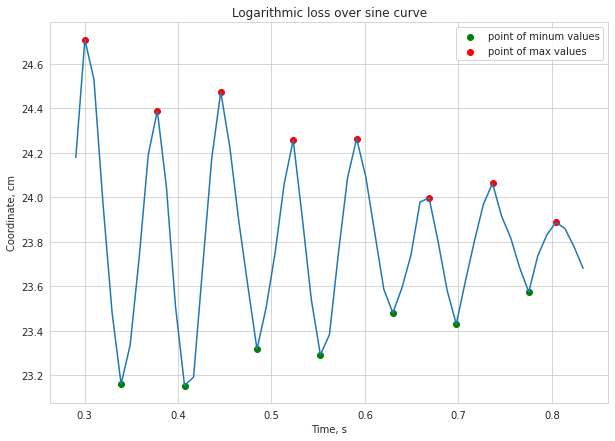

In [302]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Logarithmic loss over sine curve')
plt.plot((data_damping_decrment_air_on['t']/20.64 * 5/6)[30:], data_damping_decrment_air_on['x'][30:])
plt.scatter(min_times, min_vals, color = 'green', label = 'point of minum values')
plt.scatter(max_times, max_vals, color = 'red', label = 'point of max values')
plt.ylabel('Coordinate, cm')
plt.xlabel('Time, s')
plt.legend()

-16.62030680745755


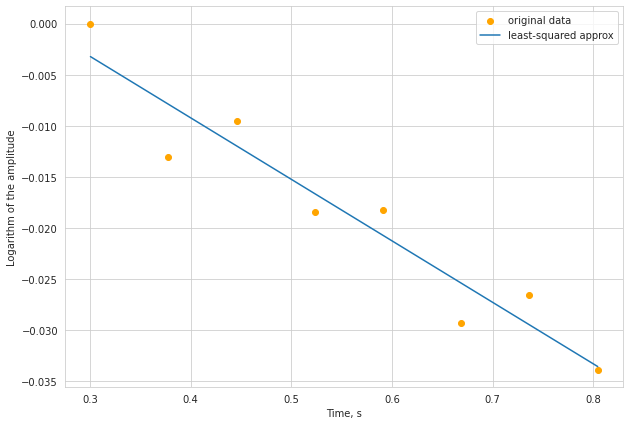

In [311]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.scatter(max_times, np.log(np.array(max_vals/max_vals[0])), label = 'original data', color = 'orange')
#plt.plot(min_times, np.log(np.array(min_vals)))

k_max, b_max = np.polyfit(max_times, np.log(np.array(max_vals/max_vals[0])), deg = 1)
plt.plot(max_times, k_max * np.array(max_times) + b_max, label = 'least-squared approx')
plt.xlabel('Time, s')
plt.ylabel('Logarithm of the amplitude')
plt.legend()
print(1/k_max)

24.1436709003043


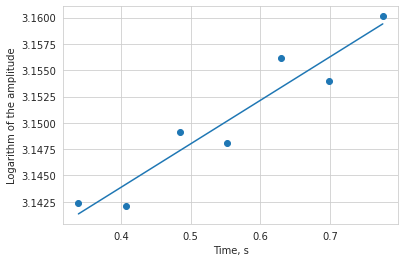

In [305]:
sns.set_style('whitegrid')
#plt.plot(max_times, np.log(np.array(max_vals)))
plt.scatter(min_times, np.log(np.array(min_vals)))

k_min, b_min = np.polyfit(min_times, np.log(np.array(min_vals)), deg = 1)
plt.plot(min_times, k_min * np.array(min_times) + b_min)
plt.xlabel('Time, s')
plt.ylabel('Logarithm of the amplitude')
print(1/k_min)

## Self-wave oscillation

In [231]:
def plot_self_wave(x, y, j, zero = 'on'):
    periods = np.array([])
    if j != 1:
        plt.figure(figsize = (20, 6))
    else:
        plt.figure(figsize = (10, 7))
    for i in range(j):
        title = 'Standing wave, Period: '
        plt.subplot(1, j, i+1)
        plt.scatter(x[i], y[i], color = 'gray', label = 'original points')  #18*9
        plt.plot(x[i], y[i], color = 'gray', label = 'original points')  #18*9
        try:
            fit_sin__ = fit_sin(x[i], y[i])
            plt.plot(np.arange(x[i][0], x[i][-1]), fit_sin__['fitfunc'](np.arange(x[i][0], x[i][-1])), color = 'green', label = 'sin approximation')
            title = title + str(round(fit_sin__['period'], 5))
            periods = np.append(periods, round(fit_sin__['period'], 5))
        except:
            title = title + 'SinErrNon'
            
        plt.title(title)
        if zero is 'on':
            plt.plot(x[i], x[i] * 0, color = 'red', linestyle=':', label = 'zero line')
        plt.xlabel("Coordinate, cm")
        plt.ylabel("Squeezings, cm")
        plt.legend()

    return periods

<>:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_3836/96094557.py:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if zero is 'on':


### 23.6 HZ

Mean period: 84.075 cm


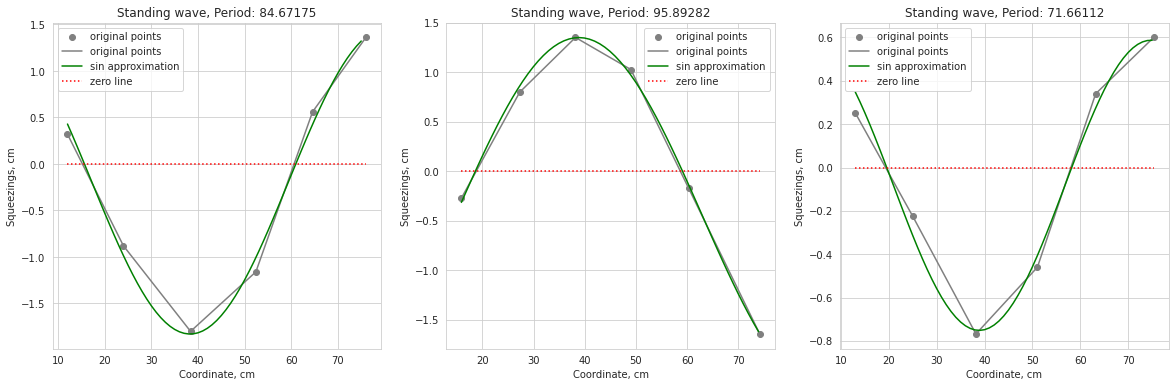

In [199]:
coordinates_23 = 4 * np.array([[3, 6, 9.6, 13.1, 16.14, 19], [3.980, 6.830, 9.548, 12.25, 15.07, 18.54], [3.249, 6.245, 9.550, 12.76, 15.80, 18.83]])#[3.564, 6.492, 9.552, 12.56, 15.57, 18.74], [3.571, 6.475, 9.557, 12.58, 15.56, 18.74]])
squeezings_23  = 4 *  (1 - np.array([[0.92, 1.22, 1.45, 1.29, 0.86, 0.66], [1.068, 0.800, 0.662, 0.743, 1.043, 1.411], [0.937, 1.056, 1.192, 1.115, 0.915, 0.850]]))# [0.997, 1.011, 1.044, 1.008, 0.978, 1.043]])), [0.946, 1.009, 1.044, 1.008, 0.978, 1.013]]))
periods = plot_self_wave(coordinates_23, squeezings_23, 3)
print('Mean period: {0:.5} cm'.format(periods.mean()))

### 10Hz

Mean period: 46.146 cm


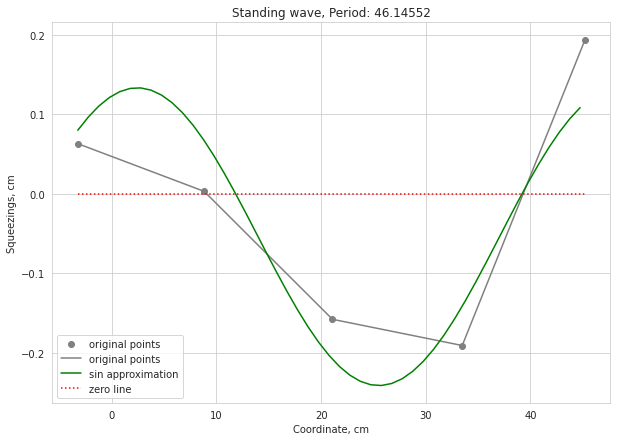

In [230]:
coordinates_10hz = np.array([[-3.250, 8.821, 21.08, 33.48, 45.22], [-3.320, 8.770, 21.08, 33.36, 45.26], [-3.370, 8.775, 21.08, 33.44, 45.39]])
squeezings_10hz  = 4 - np.array([[3.937, 3.997, 4.158, 4.191, 3.806], [3.773, 4.041, 4.073, 4.006, 3.806], [4.039, 4.041, 4.037, 4.009, 3.806]])

periods = plot_self_wave(coordinates_10hz, squeezings_10hz, 1)
print('Mean period: {0:.5} cm'.format(periods.mean()))

### 16hz

Mean period: 181.49 cm


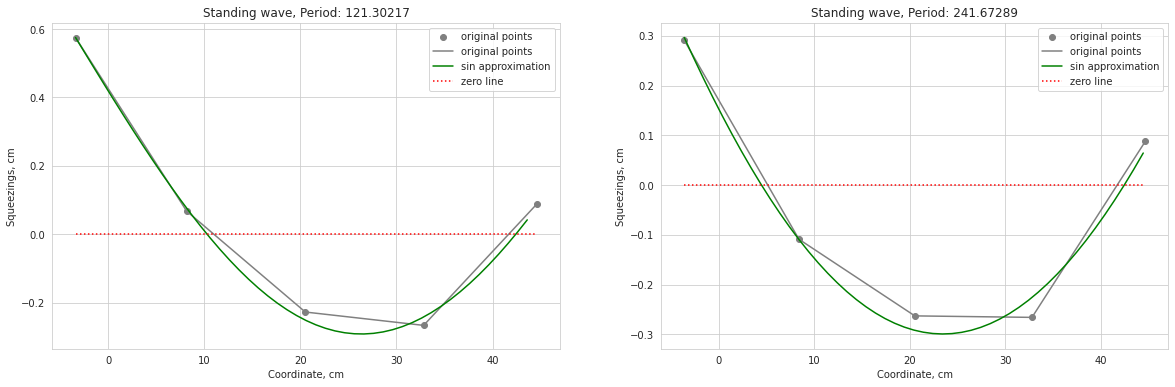

In [227]:
coordinates_16hz = np.array([[-3.388, 8.170, 20.52, 32.83, 44.59], [-3.595, 8.402, 20.52, 32.77, 44.63], [-2.983, 9.130, 20.86, 32.50, 44.12]])
squeezings_16hz  = 4 - np.array([[3.425, 3.932, 4.227, 4.266, 3.912], [3.709, 4.109, 4.263, 4.266, 3.912], [4.331, 4.124, 3.563, 3.621, 3.561]])

periods = plot_self_wave(coordinates_16hz, squeezings_16hz, 2)
print('Mean period: {0:.5} cm'.format(periods.mean()))

### 14.4Hz

Mean period: 35.717 cm


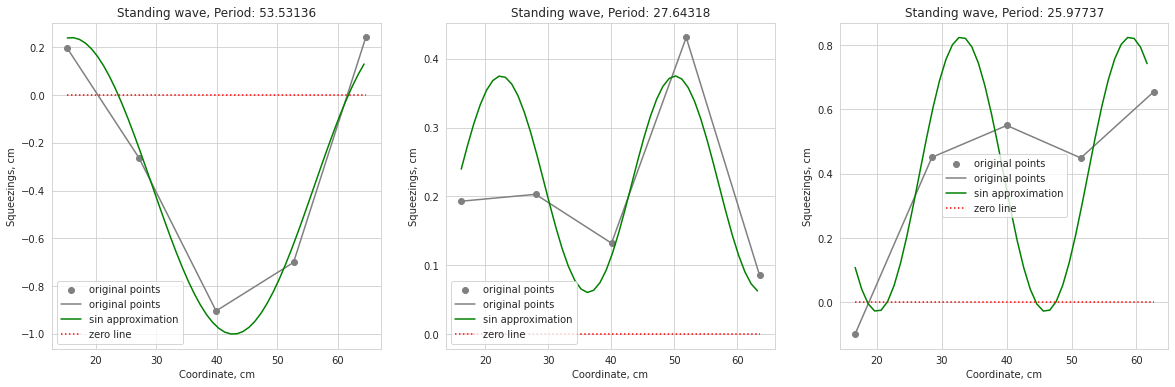

In [223]:
coordinates_14hz = np.array([[15.31, 27.11, 39.87, 52.66, 64.59], [16.20, 28.00, 40.04, 51.89, 63.54], [16.64, 28.47, 40.01, 51.42, 62.63]])
squeezings_14hz  = 4 - np.array([[3.805, 4.262, 4.904, 4.701, 3.759], [3.807, 3.797, 3.868, 3.569, 3.915], [4.098, 3.549, 3.450, 3.551, 3.346]])

periods = plot_self_wave(coordinates_14hz, squeezings_14hz, 3)
print('Mean period: {0:.5} cm'.format(periods.mean()))

### 25Hz

/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Mean period: 42.552 cm


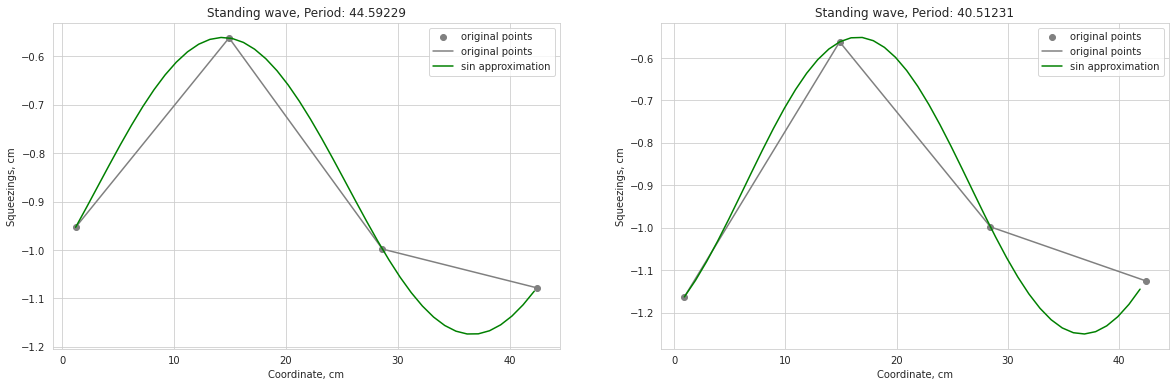

In [232]:
coordinates_25hz = np.array([[1.205, 14.92, 28.63, 42.43], [0.909, 14.88, 28.45, 42.40], [0.855, 14.69, 28.90, 42.17]])
squeezings_25hz  = 4.5 - np.array([[5.453, 5.062, 5.498, 5.578], [5.663, 5.062, 5.498, 5.625], [5.156, 4.969, 5.324, 5.111]])

periods = plot_self_wave(coordinates_25hz, squeezings_25hz, 2, zero = 'off')
print('Mean period: {0:.5} cm'.format(periods.mean()))

### 17Hz

Mean period: 25.186 cm


/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


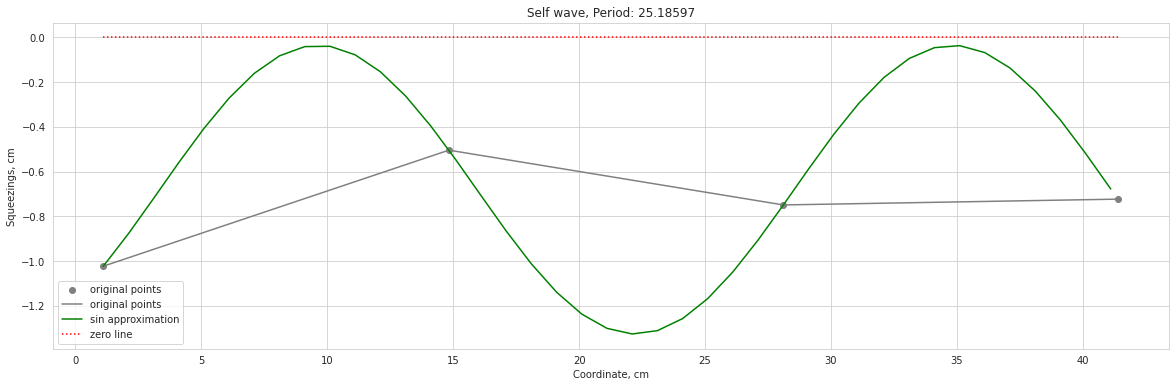

In [70]:
coordinates_17hz = np.array([[1.109, 14.83, 28.11, 41.39], [0.909, 14.88, 28.45, 42.40], [0.855, 14.69, 28.90, 42.17]])
squeezings_17hz  = 4.5 - np.array([[5.523, 5.004, 5.249, 5.223], [5.663, 5.062, 5.498, 5.625], [5.156, 4.969, 5.324, 5.111]])

periods = plot_self_wave(coordinates_17hz, squeezings_17hz, 1)
print('Mean period: {0:.5} cm'.format(periods.mean()))

### Dependence between length of standing wave and frequecny

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


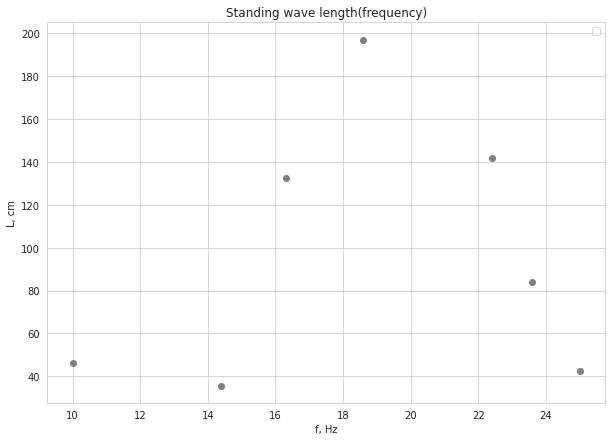

Amplitude is 


In [335]:
frequencies_overall, lengths_overall = np.array([23.6, 10, 16.3, 14.4, 25]), np.array([84.075, 46.146, 132.23, 35.717, 42.552])
fit_sin__overall = fit_sin(frequencies_overall, lengths_overall)
fitted_values = fit_sin__overall['fitfunc'](np.arange(10, 26, 0.1))

plt.figure(figsize=(10, 7))
plt.title('Standing wave length(frequency)')
plt.scatter(frequencies_overall, lengths_overall, color = 'gray')
#plt.plot(np.arange(10, 26, 0.1), fit_sin__overall['fitfunc'](np.arange(10, 26, 0.1)), label = 'Sin Approx')
#plt.plot(np.arange(10, 26, 0.1), np.ones(np.arange(10, 26, 0.1).shape[0]) * (fitted_values.max() - fitted_values.min())/2, color = 'red', linestyle = '--', label = 'zero')
#plt.scatter([np.arange(10, 26, 0.1)[59], np.arange(10, 26, 0.1)[132]], [(fitted_values.max() - fitted_values.min())/2]*2, color = 'red')
plt.scatter([18.6, 22.4] , [197, 142], color = 'gray')
plt.xlabel('f, Hz')
plt.ylabel('L, cm')
plt.legend()
plt.show()

print('Amplitude is ')


In [128]:
def equal(x, y):
    if abs(x - y) < 3:
        return 1
    return 0
arr =  fit_sin__overall['fitfunc'](np.arange(10, 26, 0.1))
mean = (fitted_values.max() - fitted_values.min())/2
for i in range(len(arr)):
    if equal(arr[i], mean):
        print(i)

59
132


In [ ]:
def wave_vector(lengths_):
    return 2 * np.pi / lengths_

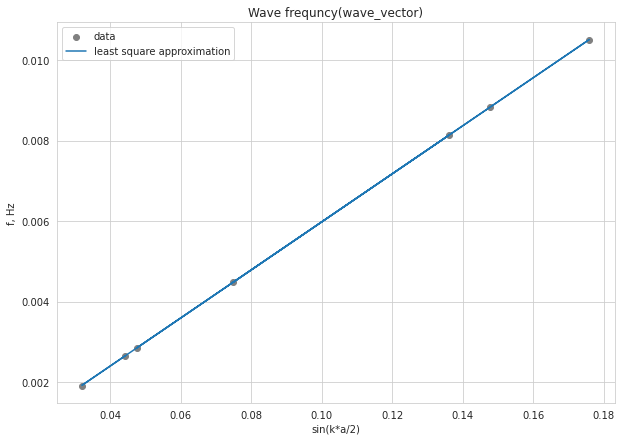

In [340]:
frequencies_overall, lengths_overall = np.array([23.6, 10, 16.3, 14.4, 25, 18.6, 22.4]), np.array([84.075, 46.146, 132.23, 35.717, 42.552, 197, 142])
fit_sin__overall = fit_sin(frequencies_overall, lengths_overall)
fitted_values = fit_sin__overall['fitfunc'](np.arange(10, 26, 0.1))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Wave frequncy(wave_vector)')

alpha, beta = np.polyfit(wave_vector(lengths_overall) , np.sin(wave_vector(lengths_overall)) * 0.12 / 2, 1)

plt.scatter(wave_vector(lengths_overall) , np.sin(wave_vector(lengths_overall)) * 0.12 / 2, color = 'gray', label = 'data')
plt.plot(wave_vector(lengths_overall), alpha * wave_vector(lengths_overall) + beta, label = 'least square approximation')

plt.xlabel('sin(k*a/2)')
plt.ylabel('f, Hz')
plt.legend()

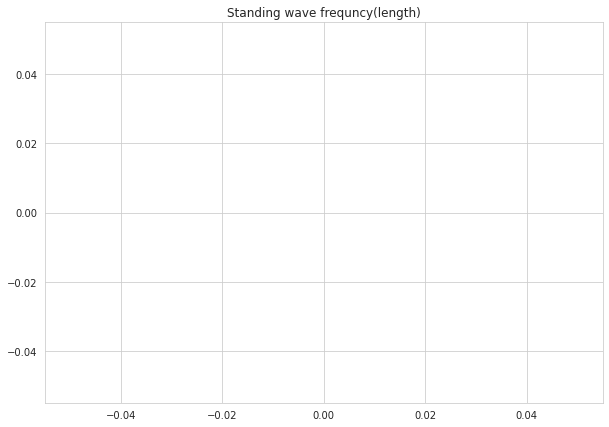

In [33]:
frequencies_overall, lengths_overall = np.array([23.6, 10, 16.3, 14.4, 25, 18.6, 22.4]), np.array([84.075, 46.146, 132.23, 35.717, 42.552, 197, 142])
fit_sin__overall = fit_sin(frequencies_overall, lengths_overall)
fitted_values = fit_sin__overall['fitfunc'](np.arange(10, 26, 0.1))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.title('Standing wave frequncy(length)')

#alpha, beta = np.polyfit(wave_vector(lengths_overall) , np.sin(wave_vector(lengths_overall)) * 0.12 / 2, 1)
wave_vect_sin = fit_sin(wave_vector(lengths_overall), frequencies_overall)

#plt.plot(np.arange(0.02, 0.019, 0.005), wave_vect_sin['fitfunc'](np.arange(0.02, 0.019, 0.005)))

#plt.plot(wave_vector(lengths_overall), )
#plt.plot(wave_vector(lengths_overall), alpha * wave_vector(lengths_overall) + beta, label = 'least square approximation')

#plt.legend()

## Energy of the whole chain of atoms:

In [276]:
energy_data_1 = pd.read_csv('swag/23.6Hz 1 carriage.txt', sep ='\t')
energy_data_2 = pd.read_csv('swag/23.6Hz 2 carriage.txt', sep ='\t')
energy_data_3 = pd.read_csv('swag/23.6Hz 3 carriage.txt', sep ='\t')
energy_data_4 = pd.read_csv('swag/23.6Hz 4 carriage.txt', sep ='\t')
energy_data_5 = pd.read_csv('swag/23.6Hz 5 carriage.txt', sep ='\t')
energy_data_6 = pd.read_csv('swag/23.6Hz 6 carriage.txt', sep ='\t')

In [277]:
energy_data_1

,t,v_x,x
0,0.00,NaN,7.548404
1,0.16,0.241984,7.736803
2,0.32,-0.719005,7.625839
3,0.48,-0.962276,7.506721
4,0.64,-0.884190,7.317911
...,...,...,...
193,30.88,-0.896636,7.503674
194,31.04,-0.694809,7.374916
195,31.20,-0.468866,7.281335
196,31.36,0.945457,7.224879


In [278]:
energy_data_1['t'] = (energy_data_1['t'] / 31.52 * 788/600)
energy_data_2['t'] = (energy_data_2['t'] / 31.52 * 788/600)
energy_data_3['t'] = (energy_data_3['t'] / 31.52 * 788/600)
energy_data_4['t'] = (energy_data_4['t'] / 31.52 * 788/600)
energy_data_5['t'] = (energy_data_5['t'] / 31.52 * 788/600)
energy_data_6['t'] = (energy_data_6['t'] / 31.52 * 788/600)

energy_data_1['v_x'] = (energy_data_1['v_x'] * 31.52 * 600 / 788)
energy_data_2['v_x'] = (energy_data_2['v_x'] * 31.52 * 600 / 788)
energy_data_3['v_x'] = (energy_data_3['v_x'] * 31.52 * 600 / 788)
energy_data_4['v_x'] = (energy_data_4['v_x'] * 31.52 * 600 / 788)
energy_data_5['v_x'] = (energy_data_5['v_x'] * 31.52 * 600 / 788)
energy_data_6['v_x'] = (energy_data_6['v_x'] * 31.52 * 600 / 788)

In [279]:
mass_of_carriage = 11 / 1000
mass_of_ball = 5.6 / 1000
resilience = 110

In [280]:
potential_zero = resilience * (2/100)**2 /2
times = np.arange(0, 1.32, 0.001)

In [281]:
left_edge = 0 #cm 
right_edge = 78 #cm 

first_spring   = energy_data_1
second_spring  = energy_data_1
third_spring   = energy_data_1
fourth_spring  = energy_data_1
fifth_spring   = energy_data_1
sixth_spring   = energy_data_1
seventh_spring = energy_data_1

fit_potential_energy_1 = fit_sin(energy_data_1['t'][1:-2], energy_data_1['x'][1:-2])['fitfunc'](times)
fit_potential_energy_2 = fit_sin(energy_data_2['t'][1:-2], energy_data_2['x'][1:-2])['fitfunc'](times)
fit_potential_energy_3 = fit_sin(energy_data_3['t'][1:-2], energy_data_3['x'][1:-2])['fitfunc'](times)
fit_potential_energy_4 = fit_sin(energy_data_4['t'][1:-2], energy_data_4['x'][1:-2])['fitfunc'](times)
fit_potential_energy_5 = fit_sin(energy_data_5['t'][1:-2], energy_data_5['x'][1:-2])['fitfunc'](times)
fit_potential_energy_6 = fit_sin(energy_data_6['t'][1:-2], energy_data_6['x'][1:-2])['fitfunc'](times)

first_spring_delta   = (fit_potential_energy_1 - left_edge - 4 - 7.5) / 100 #4 cm is l0 for a spring, 7.5 is a diametr of the carriage 
second_spring_delta  = (fit_potential_energy_2 - fit_potential_energy_1 - 4 - 7.5) / 100 #4 cm is l0 for a spring, 7.5 is a diametr of the carriage 
third_spring_delta   = (fit_potential_energy_3 - fit_potential_energy_2 - 4 - 7.5) / 100 #4 cm is l0 for a spring, 7.5 is a diametr of the carriage 
fourth_spring_delta  = (fit_potential_energy_4 - fit_potential_energy_3 - 4 - 7.5) / 100 #4 cm is l0 for a spring, 7.5 is a diametr of the carriage 
fifth_spring_delta   = (fit_potential_energy_5 - fit_potential_energy_4 - 4 - 7.5) / 100 #4 cm is l0 for a spring, 7.5 is a diametr of the carriage 
sixth_spring_delta   = (fit_potential_energy_6 - fit_potential_energy_5 - 4 - 7.5) / 100 #4 cm is l0 for a spring, 7.5 is a diametr of the carriage 
seventh_spring_delta = (right_edge - fit_potential_energy_6 - 4 - 7.5) / 100 #4 cm is l0 for a spring, 7.5 is a diametr of the carriage 

In [283]:
fit_kinetic_energy_1 = fit_sin(energy_data_1['t'][1:-2], energy_data_1['v_x'][1:-2])['fitfunc'](times) / 100
fit_kinetic_energy_2 = fit_sin(energy_data_2['t'][1:-2], energy_data_2['v_x'][1:-2])['fitfunc'](times) / 100
fit_kinetic_energy_3 = fit_sin(energy_data_3['t'][1:-2], energy_data_3['v_x'][1:-2])['fitfunc'](times) / 100
fit_kinetic_energy_4 = fit_sin(energy_data_4['t'][1:-2], energy_data_4['v_x'][1:-2])['fitfunc'](times) / 100
fit_kinetic_energy_5 = fit_sin(energy_data_5['t'][1:-2], energy_data_5['v_x'][1:-2])['fitfunc'](times) / 100
fit_kinetic_energy_6 = fit_sin(energy_data_6['t'][1:-2], energy_data_6['v_x'][1:-2])['fitfunc'](times) / 100

In [284]:
fit_kinetic_energy_2

array([-0.04553797, -0.02569663, -0.00526187, ...,  0.08348797,
        0.0661873 ,  0.04741513])

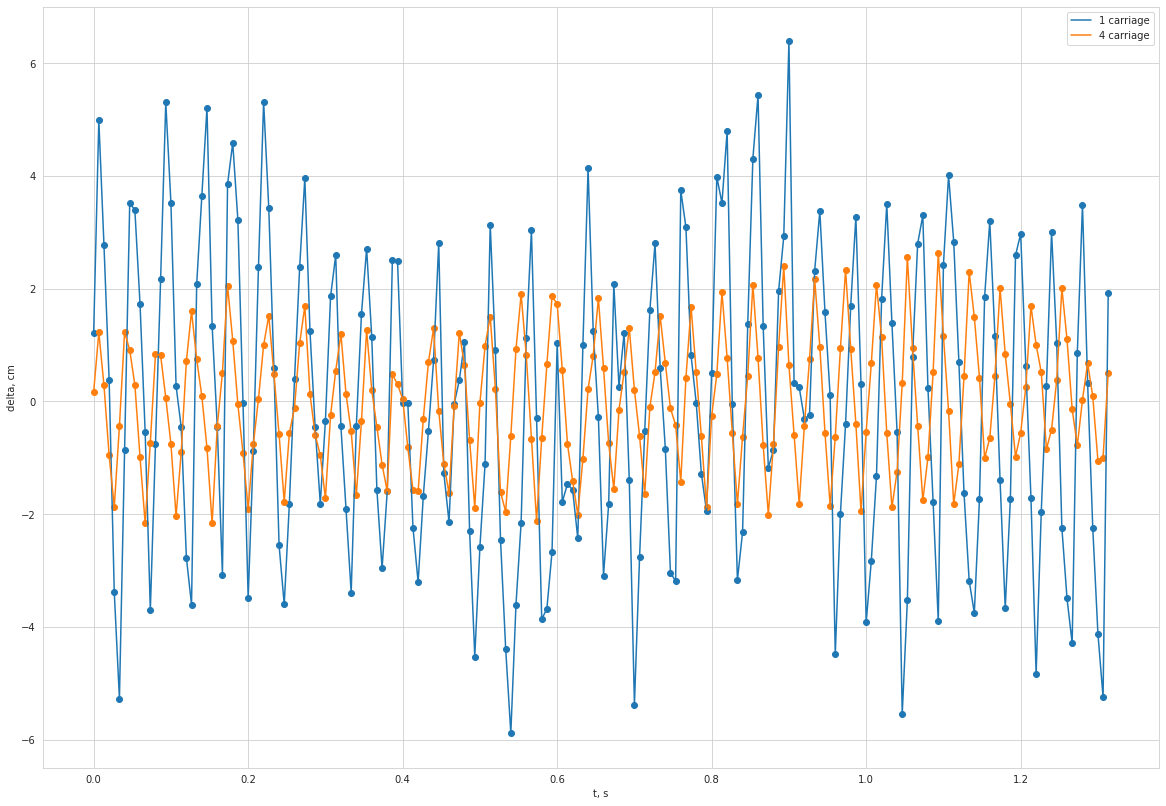

In [331]:
plt.figure(figsize=(20, 14))
plt.plot(energy_data_1['t'], 20 * (energy_data_1['x'] - energy_data_1['x'].mean()), label = '1 carriage')
plt.scatter(energy_data_1['t'], 20 * (energy_data_1['x'] - energy_data_1['x'].mean()))

plt.plot(energy_data_4['t'], 7 * (energy_data_4['x'] - energy_data_4['x'].mean()), label = '4 carriage')
plt.scatter(energy_data_4['t'], 7 * (energy_data_4['x'] - energy_data_4['x'].mean()))

plt.xlabel('t, s')
plt.ylabel('delta, cm')
plt.legend()
plt.show()

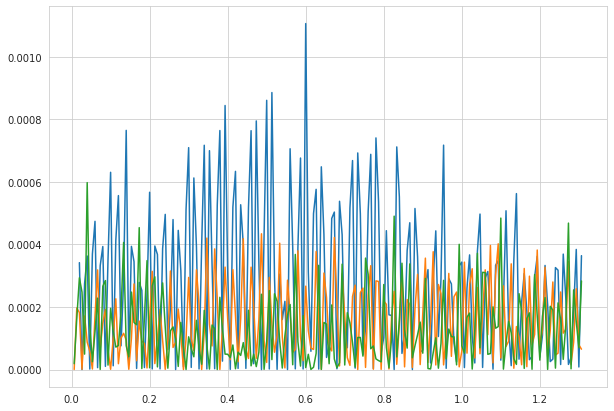

In [286]:
#1/2*(np.square(sixth_spring['x'] / 100) + np.square(seventh_spring['x'] / 100)) * resilience
plt.figure(figsize=(10, 7))
plt.plot(energy_data_6['t'], 1/2 * (np.square(energy_data_6['v_x'] / 100)) * mass_of_carriage)
plt.plot(energy_data_5['t'], 1/2 * (np.square(energy_data_5['v_x'] / 100)) * mass_of_carriage)
#plt.plot(energy_data_3['t'], 1/2 * (np.square(energy_data_3['v_x'] / 100)) * mass_of_carriage)
plt.plot(energy_data_1['t'], 1/2 * (np.square(energy_data_1['v_x'] / 100)) * mass_of_carriage)

In [287]:
potential_energy = 1/2 * (np.square(first_spring_delta) + np.square(second_spring_delta) + np.square(third_spring_delta) + np.square(fourth_spring_delta) + np.square(fifth_spring_delta) + np.square(sixth_spring_delta) + np.square(seventh_spring_delta))* resilience

In [341]:
potential_energy

array([0.13813105, 0.13782455, 0.1374975 , ..., 0.13678319, 0.13563246,
       0.13449649])

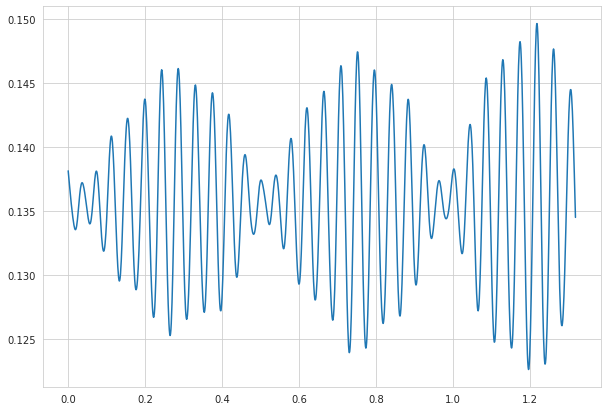

In [343]:
plt.figure(figsize=(10, 7))
plt.plot(times, potential_energy)

In [290]:
kinetic_energy = 1/2 * mass_of_carriage * (np.square(fit_kinetic_energy_2) + np.square(fit_kinetic_energy_4) + np.square(fit_kinetic_energy_6)) + 1/2 * (mass_of_carriage + mass_of_ball) * (np.square(fit_kinetic_energy_1) + np.square(fit_kinetic_energy_3) + np.square(fit_kinetic_energy_5))

In [291]:
kinetic_energy

array([0.00051278, 0.00052815, 0.0005318 , ..., 0.00057622, 0.00049129,
       0.00040483])

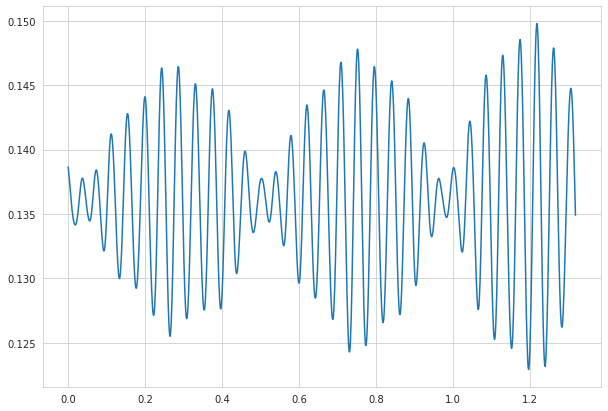

In [292]:
plt.figure(figsize=(10, 7))
plt.plot(times, potential_energy + kinetic_energy)

In [178]:
full_energy_6 = (1/2 * (np.square(energy_data_6['v_x'] / 100)) * mass_of_carriage + 1/2*(np.square(sixth_spring['x'] / 100) + np.square(seventh_spring['x'] / 100)) * resilience)
full_energy_5 = (1/2 * (np.square(energy_data_5['v_x'] / 100)) * (mass_of_carriage + mass_of_ball) + 1/2*(np.square(fifth_spring['x'] / 100) + np.square(sixth_spring['x'] / 100)) * resilience)
full_energy_4 = (1/2 * (np.square(energy_data_4['v_x'] / 100)) * mass_of_carriage + 1/2*(np.square(fourth_spring['x'] / 100) + np.square(fifth_spring['x'] / 100)) * resilience)
full_energy_3 = (1/2 * (np.square(energy_data_3['v_x'] / 100)) *  (mass_of_carriage + mass_of_ball) + 1/2*(np.square(third_spring['x'] / 100) + np.square(fourth_spring['x'] / 100)) * resilience)
full_energy_2 = (1/2 * (np.square(energy_data_2['v_x'] / 100)) * mass_of_carriage + 1/2*(np.square(second_spring['x'] / 100) + np.square(third_spring['x'] / 100)) * resilience)
full_energy_1 = (1/2 * (np.square(energy_data_1['v_x'] / 100)) * (mass_of_carriage + mass_of_ball) + 1/2*(np.square(first_spring['x'] / 100) + np.square(second_spring['x'] / 100)) * resilience)

In [179]:
#full_energy = (full_energy_1 + full_energy_2 + full_energy_3 + full_energy_3 + full_energy_4 + full_energy_5 + full_energy_6).dropna()
kinetic_full_energy = 1/2 * (np.square(energy_data_6['v_x'] / 100)) * mass_of_carriage + 1/2 * (np.square(energy_data_5['v_x'] / 100)) * (mass_of_carriage + mass_of_ball) + 1/2 * (np.square(energy_data_4['v_x'] / 100)) * mass_of_carriage + 1/2 * (np.square(energy_data_3['v_x'] / 100)) *  (mass_of_carriage + mass_of_ball) +  1/2 * (np.square(energy_data_2['v_x'] / 100)) * mass_of_carriage + 1/2 * (np.square(energy_data_1['v_x'] / 100)) * (mass_of_carriage + mass_of_ball) 
potential_full_energy = 6*potential_zero - 1/2*(np.square(sixth_spring['x'] / 100) + np.square(seventh_spring['x'] / 100) + np.square(fourth_spring['x'] / 100) + np.square(fifth_spring['x'] / 100) + np.square(third_spring['x'] / 100) + np.square(second_spring['x'] / 100) + np.square(first_spring['x'] / 100)) * resilience

full_energy = (kinetic_full_energy + potential_full_energy).dropna()

Text(0, 0.5, 'En, J')

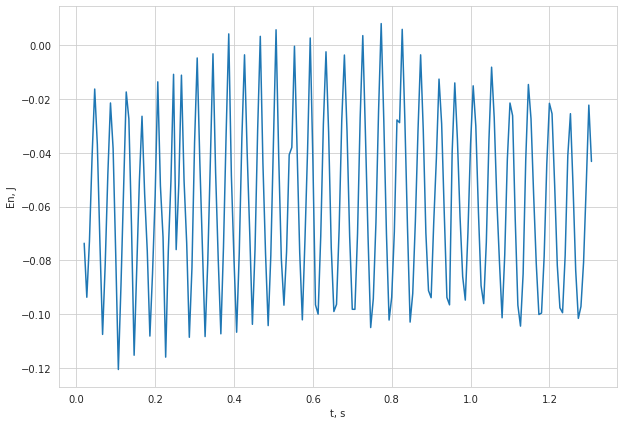

In [180]:
plt.figure(figsize=(10, 7))
plt.plot(energy_data_6['t'][1:195],   full_energy)
#plt.plot(energy_data_6['t'][1:195], full_energy_5.dropna()[1:195])
#plt.plot(energy_data_6['t'][1:195], full_energy_4.dropna()[1:195])
#plt.plot(energy_data_6['t'][1:195], full_energy_3.dropna()[1:195])
#plt.plot(energy_data_6['t'][1:195], full_energy_2.dropna()[1:195])
#plt.plot(energy_data_6['t'][1:195], full_energy_1.dropna()[1:195])
#plt.scatter([0.4], [0.0000000001], color = 'white')
plt.xlabel('t, s')
plt.ylabel('En, J')

In [128]:
full_energy_6.dropna()

1      0.059256
2      0.064781
3      0.059239
4      0.050201
5      0.042807
         ...   
190    0.065753
191    0.061403
192    0.053414
193    0.044299
194    0.050944
Length: 194, dtype: float64

In [108]:
(1/2 * (np.square(energy_data_6['v_x'] / 100)) * mass_of_carriage + 1/2*(np.square(sixth_spring['x'] / 100) + np.square(seventh_spring['x'] / 100)) * resilience).dropna().mean()

0.055085111519628256